# EDA CALTECH
We will create a MNIST Dataset in order to try it.

In [2]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')
from src.classification import ClassificationCALTECH
mnist_path = "/mnt/c/BUSDATA/Datasets/CALTECH256/flat/"

cls_dataset = ClassificationCALTECH(mnist_path,nmax_per_class=100)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 96/96 [00:00<00:00, 198.58it/s]


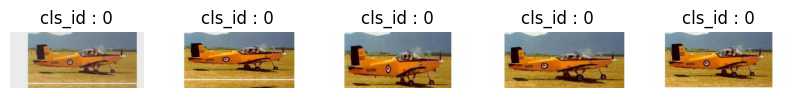

In [8]:
import matplotlib.pyplot as plt
n_img = 5
fig,ax = plt.subplots(1,n_img,figsize=(10,2))

for i in range(n_img):
    img,target,name = cls_dataset[2]

    img_np = (img.numpy().transpose(1,2,0)+1)*127.5
    ax[i].imshow(img_np)
    ax[i].set_title(f'cls_id : {target}')
    ax[i].axis('off')
plt.show()